In [15]:
 # Image Classification using CNNs | Developed by Salim El Ghersse, Maria Chmite, and Mohamed Ouballouk.
 !pip install -q kaggl

ERROR: Could not find a version that satisfies the requirement kaggl (from versions: none)
ERROR: No matching distribution found for kaggl


In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle competitions download -c cifar-10

100% 714M/715M [00:18<00:00, 40.7MB/s]
100% 715M/715M [00:18<00:00, 40.6MB/s]


In [19]:
!unzip cifar-10.zip

Archive:  cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


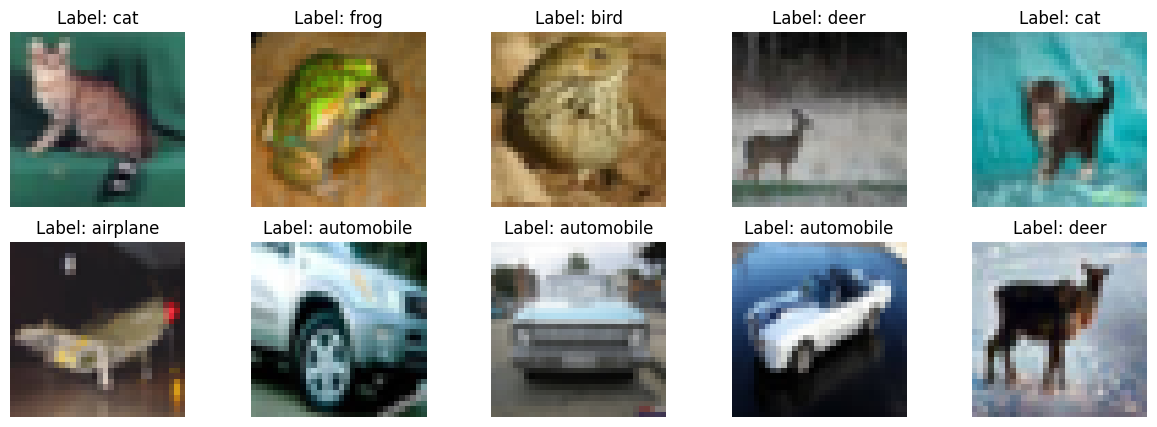

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Choose 10 random indices
random_indices = np.random.choice(len(x_test), size=10, replace=False)

# Label mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Plot the random images with labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(x_test[idx])
    label_index = y_test[idx][0]
    plt.title(f"Label: {label_mapping[label_index]}")  # Display the mapped label
    plt.axis('off')

plt.show()


Epoch 1/30
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4621 - accuracy: 0.4755 - val_loss: 1.5583 - val_accuracy: 0.4873 - lr: 0.0010
Epoch 2/30
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1574 - accuracy: 0.5913 - val_loss: 1.3212 - val_accuracy: 0.5707 - lr: 0.0010
Epoch 3/30
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0462 - accuracy: 0.6303 - val_loss: 1.2411 - val_accuracy: 0.5577 - lr: 0.0010
Epoch 4/30
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9754 - accuracy: 0.6593 - val_loss: 1.3228 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 5/30
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9326 - accuracy: 0.6731 - val_loss: 0.8684 - val_accuracy: 0.6952 - lr: 0.0010
Epoch 6/30
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8953 - accuracy: 0.6865 - val_loss: 0.8953 - val_accuracy: 0.6931 - lr: 0.0010
Epoch 7/30
1563/1563 [========================

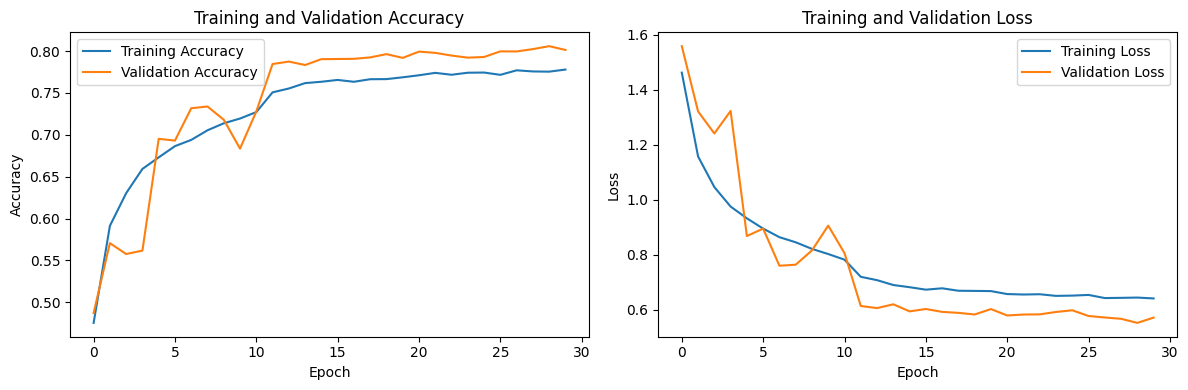

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define the model with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),

    Flatten(),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(10, activation='softmax')
])

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

initial_lr = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])


# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



# **Measuring Model Performance with F1 score**


In [22]:
import numpy as np
from sklearn.metrics import f1_score
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Calculate F1 score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')

313/313 - 1s - loss: 0.5718 - accuracy: 0.8013 - 714ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.8013
Test F1 Score: 0.7972


# **Introducing Learning scheduler Callback and Adding additional layer**

Epoch 1/30
782/782 [==============================] - 29s 34ms/step - loss: 1.4482 - accuracy: 0.4811 - val_loss: 1.6871 - val_accuracy: 0.4541 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 26s 33ms/step - loss: 1.1491 - accuracy: 0.5903 - val_loss: 1.6396 - val_accuracy: 0.4819 - lr: 0.0010
Epoch 3/30
782/782 [==============================] - 26s 33ms/step - loss: 1.0376 - accuracy: 0.6347 - val_loss: 1.0272 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 4/30
782/782 [==============================] - 26s 33ms/step - loss: 0.9695 - accuracy: 0.6591 - val_loss: 0.9513 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 5/30
782/782 [==============================] - 26s 33ms/step - loss: 0.9150 - accuracy: 0.6785 - val_loss: 0.9362 - val_accuracy: 0.6770 - lr: 0.0010
Epoch 6/30
782/782 [==============================] - 26s 33ms/step - loss: 0.8739 - accuracy: 0.6935 - val_loss: 0.8799 - val_accuracy: 0.6889 - lr: 0.0010
Epoch 7/30
782/782 [==============================] - 26s 

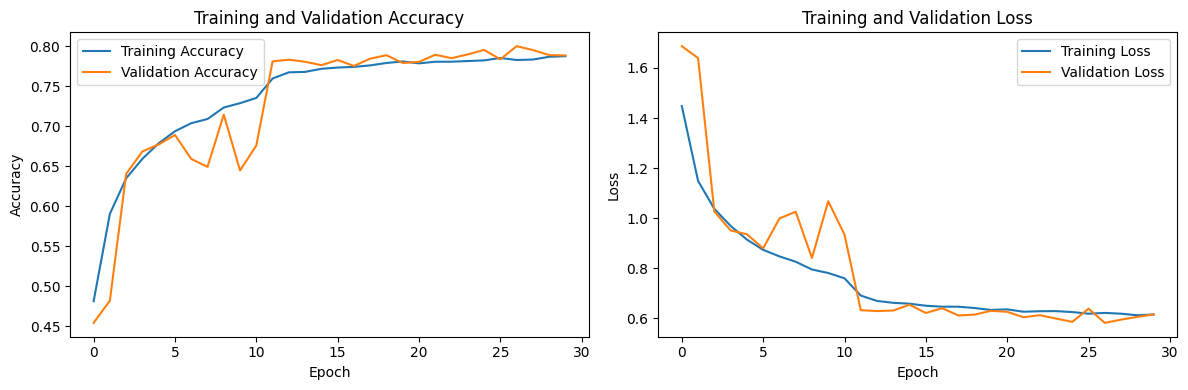

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Define the model with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),

    Flatten(),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(10, activation='softmax')
])

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

initial_lr = lr_schedule(0)
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])


# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()




Epoch 1/30
782/782 [==============================] - 29s 34ms/step - loss: 1.7506 - accuracy: 0.3664 - val_loss: 1.5699 - val_accuracy: 0.4305 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 26s 33ms/step - loss: 1.4576 - accuracy: 0.4763 - val_loss: 1.3638 - val_accuracy: 0.5101 - lr: 0.0010
Epoch 3/30
782/782 [==============================] - 26s 33ms/step - loss: 1.3503 - accuracy: 0.5196 - val_loss: 1.3672 - val_accuracy: 0.5213 - lr: 0.0010
Epoch 4/30
782/782 [==============================] - 26s 33ms/step - loss: 1.2747 - accuracy: 0.5495 - val_loss: 1.0230 - val_accuracy: 0.6408 - lr: 0.0010
Epoch 5/30
782/782 [==============================] - 26s 33ms/step - loss: 1.2160 - accuracy: 0.5781 - val_loss: 1.1392 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 6/30
782/782 [==============================] - 26s 33ms/step - loss: 1.1769 - accuracy: 0.5887 - val_loss: 0.9881 - val_accuracy: 0.6483 - lr: 0.0010
Epoch 7/30
782/782 [==============================] - 26s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


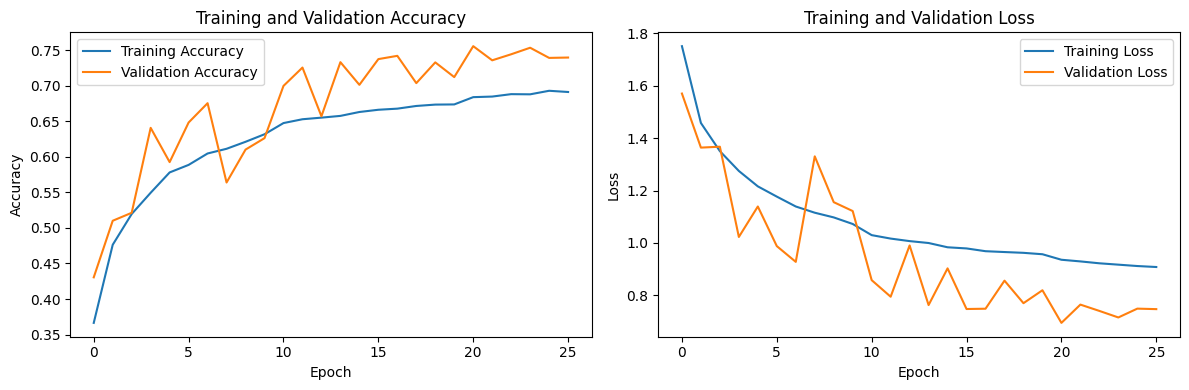

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
# )
# datagen.fit(x_train)

# Define the model with Batch Normalization and Dropout
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'), MaxPooling2D((2, 2)),
    Dropout(0.1),  # Lowered dropout rate

    Conv2D(64, (3, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'), MaxPooling2D((2, 2)),
    Dropout(0.2),  # Lowered dropout rate

    Conv2D(64, (3, 3), kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'),
    Dropout(0.3),  # Lowered dropout rate

    Flatten(),
    Dense(64, kernel_regularizer=l2(1e-5)),
    BatchNormalization(), Activation('relu'),
    Dropout(0.4),  # Lowered dropout rate

    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and initial learning rate
initial_lr = 1e-3
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * (0.5 ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

# Save the model
model.save('my_model.h5')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# **Using the model to predict on Different Number of Batches and Computing Overall Accuracy**

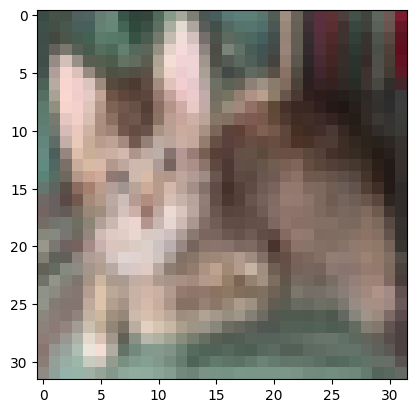

1/1 [==============================] - 0s 262ms/step
Predictions for the batch:
Image 1: True label: frog, Predicted label: frog, Accuracy: 1
Image 2: True label: ship, Predicted label: ship, Accuracy: 1
Image 3: True label: airplane, Predicted label: airplane, Accuracy: 1
Image 4: True label: horse, Predicted label: horse, Accuracy: 1
Image 5: True label: airplane, Predicted label: airplane, Accuracy: 1

Overall accuracy for the batch: 100.00%


In [25]:
from tensorflow.keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained model
loaded_model = load_model('my_model.h5')

# Define label_mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Choose a random index from the test set
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

# Make predictions using the loaded model for a batch of images
batch_size = 5  # Adjust the batch size as needed
random_indices = [random.randint(0, len(y_test) - 1) for _ in range(batch_size)]
batch_images = x_test[random_indices]
batch_labels = y_test[random_indices]

y_pred_batch = loaded_model.predict(batch_images)
predicted_classes_batch = np.argmax(y_pred_batch, axis=1)

# Map the predicted class indices to labels
predicted_labels_batch = [label_mapping[pred_class] for pred_class in predicted_classes_batch]

# Calculate accuracy for each prediction
accuracies = [1 if np.argmax(true_label) == pred_label else 0
              for true_label, pred_label in zip(batch_labels, predicted_classes_batch)]

print("Predictions for the batch:")
for i, (true_label, pred_label, accuracy) in enumerate(zip(batch_labels, predicted_labels_batch, accuracies)):
    print(f"Image {i + 1}: True label: {label_mapping[np.argmax(true_label)]}, "
          f"Predicted label: {pred_label}, Accuracy: {accuracy}")

# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"\nOverall accuracy for the batch: {overall_accuracy * 100:.2f}%")


**Installing keras-tuner**


In [31]:
!pip install -q -U keras-tuner

**Hyperparameter Tuning as Explained in the Report**

---



In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Prefetch data batches for improved data loading efficiency
train_data = datagen.flow(x_train, y_train, batch_size=256)  # Increased batch size

# Function to build the model with hyperparameters
def build_hypermodel(hp):
    model = Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=64, step=16),
            kernel_size=(3, 3),
            input_shape=(32, 32, 3)
        ),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Conv2D(
            filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
            kernel_size=(3, 3)
        ),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(units=hp.Int('dense_units', min_value=64, max_value=128, step=32)),
        BatchNormalization(),
        Activation('relu'),

        Dense(10, activation='softmax')
    ])

    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-3, sampling='LOG')
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])

    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = SGD(learning_rate=hp_learning_rate, momentum=0.9)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=10,  # Reduced max epochs for faster tuning
    hyperband_iterations=2,
    directory='hyperband',
    project_name='cifar10_tuning'
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

# Perform hyperparameter tuning
tuner.search(
    x=x_train,
    y=y_train,
    epochs=10,  # Reduced epochs for tuning
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with the best hyperparameters
history = best_model.fit(
    train_data,
    epochs=15,  # Reduced epochs for training
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Trial 174 Complete [00h 02m 11s]
val_accuracy: 0.70169997215271

Best val_accuracy So Far: 0.7559000253677368
Total elapsed time: 02h 48m 21s
Epoch 1/15
196/196 [==============================] - 26s 123ms/step - loss: 1.4016 - accuracy: 0.5009 - val_loss: 4.0840 - val_accuracy: 0.1000
Epoch 2/15
196/196 [==============================] - 24s 123ms/step - loss: 1.1148 - accuracy: 0.6045 - val_loss: 2.1037 - val_accuracy: 0.3080
Epoch 3/15
196/196 [==============================] - 24s 121ms/step - loss: 1.0095 - accuracy: 0.6487 - val_loss: 0.9810 - val_accuracy: 0.6539
Epoch 4/15
196/196 [==============================] - 24s 121ms/step - loss: 0.9290 - accuracy: 0.6759 - val_loss: 0.8672 - val_accuracy: 0.6958
Epoch 5/15
196/196 [==============================] - 24s 121ms/step - loss: 0.8813 - accuracy: 0.6934 - val_loss: 1.2351 - val_accuracy: 0.5895
Epoch 6/15
196/196 [==============================] - 24s 120ms/step - loss: 0.8376 - accuracy: 0.7051 - val_loss: 1.0009 - val_accur

Epoch 1/30
782/782 [==============================] - 30s 35ms/step - loss: 1.5665 - accuracy: 0.4272 - val_loss: 1.2481 - val_accuracy: 0.5565 - lr: 0.0024
Epoch 2/30
782/782 [==============================] - 26s 33ms/step - loss: 1.2411 - accuracy: 0.5581 - val_loss: 1.1414 - val_accuracy: 0.6058 - lr: 0.0024
Epoch 3/30
782/782 [==============================] - 26s 33ms/step - loss: 1.1240 - accuracy: 0.5998 - val_loss: 1.0711 - val_accuracy: 0.6309 - lr: 0.0024
Epoch 4/30
782/782 [==============================] - 26s 33ms/step - loss: 1.0533 - accuracy: 0.6290 - val_loss: 0.9210 - val_accuracy: 0.6842 - lr: 0.0024
Epoch 5/30
782/782 [==============================] - 26s 33ms/step - loss: 0.9988 - accuracy: 0.6479 - val_loss: 0.8921 - val_accuracy: 0.6886 - lr: 0.0024
Epoch 6/30
782/782 [==============================] - 26s 33ms/step - loss: 0.9597 - accuracy: 0.6632 - val_loss: 0.9214 - val_accuracy: 0.6853 - lr: 0.0024
Epoch 7/30
782/782 [==============================] - 26s 

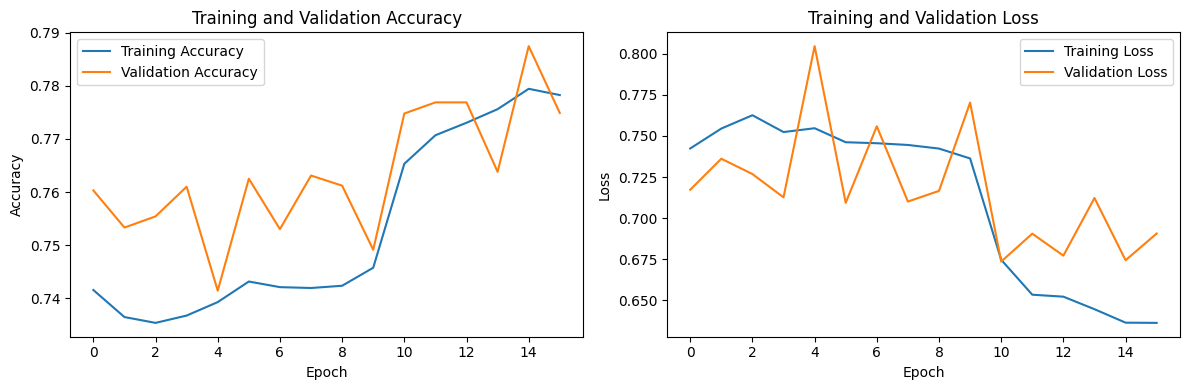

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import kerastuner as kt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import kerastuner as kt
from tensorflow.keras.optimizers import Adam, SGD, Nadam

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Hyperparameters from the image
conv_1_filters = 64
conv_2_filters = 128
conv_3_filters = 96
dense_units = 128
learning_rate = 0.0023502
optimizer = 'nadam'

# Build the sequential model
model = Sequential([
    Conv2D(conv_1_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(conv_2_filters, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(conv_3_filters, (3, 3), activation='relu'),
    Flatten(),
    Dense(dense_units, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes as in CIFAR-10
])

# Compile the model with the Nadam optimizer and the given learning rate
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def lr_schedule(epoch):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * (0.5 ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=40,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])
# Save the model
model.save('my_model.h5')


# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


**Training model after hyperparameter tuning**

In [32]:
!pip install tensorflow

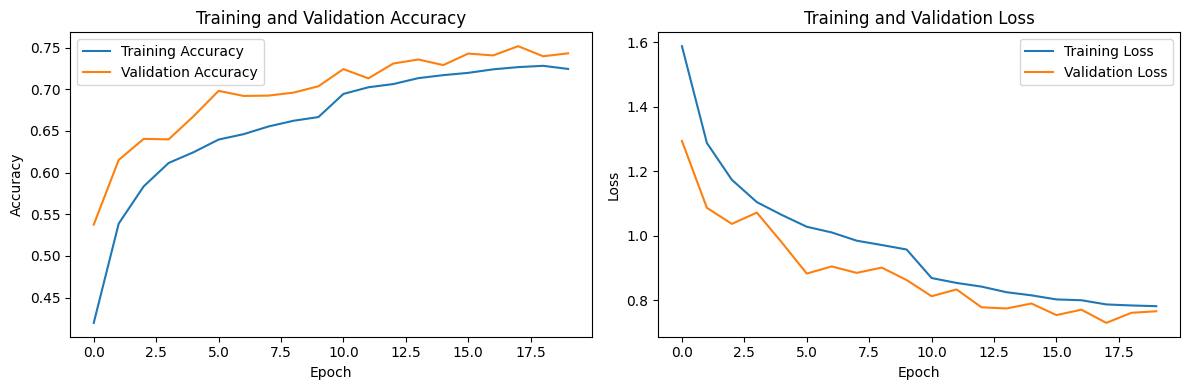

In [33]:

import keras
from keras.models import load_model
import matplotlib.pyplot as plt

loaded_model = load_model('my_model.h5')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**Hyperparameter tuning with number of batches and number of epochs**

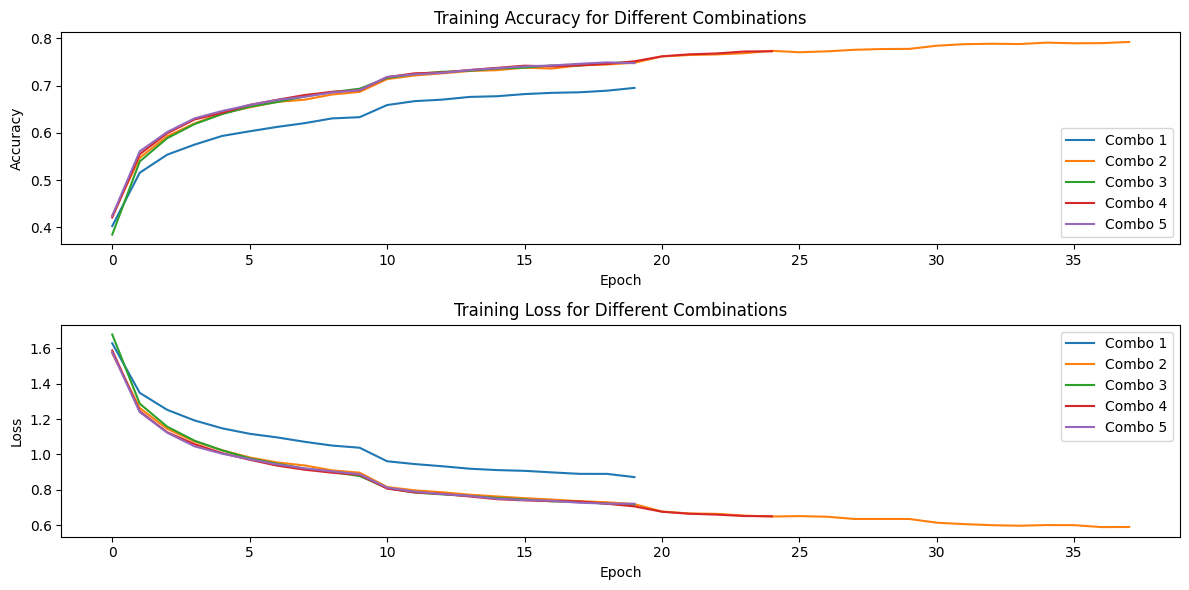

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Hyperparameters from the image
conv_1_filters = 64
conv_2_filters = 128
conv_3_filters = 96
dense_units = 128
learning_rate = 0.0023502
optimizer = Nadam()

# Define different combinations
combinations = [
    {'epochs': 20, 'batch_size': 32},
    {'epochs': 50, 'batch_size': 64},
    {'epochs': 20, 'batch_size': 128},
    {'epochs': 25, 'batch_size': 64},
    {'epochs': 20, 'batch_size': 64}
]

# Plot setup
plt.figure(figsize=(12, 6))

for i, combo in enumerate(combinations):
    # Build the model
    model = Sequential([
        Conv2D(conv_1_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(conv_2_filters, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(conv_3_filters, (3, 3), activation='relu'),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Nadam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Set up callbacks
    lr_scheduler = LearningRateScheduler(lambda epoch: learning_rate * (0.5 ** (epoch // 10)))
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(datagen.flow(x_train, y_train, batch_size=combo['batch_size']),
                        epochs=combo['epochs'],
                        validation_data=(x_test, y_test),
                        callbacks=[lr_scheduler, early_stopping],
                        verbose=0)

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label=f'Combo {i+1}')

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label=f'Combo {i+1}')

# Finalize the plots
plt.subplot(2, 1, 1)
plt.title('Training Accuracy for Different Combinations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Training Loss for Different Combinations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




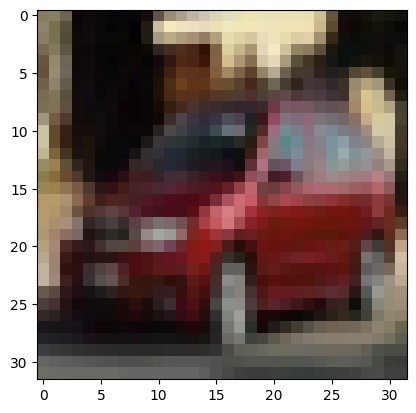

1/1 [==============================] - 0s 218ms/step
Predictions for the batch:
Image 1: True label: truck, Predicted label: truck, Accuracy: 1
Image 2: True label: ship, Predicted label: ship, Accuracy: 1
Image 3: True label: frog, Predicted label: frog, Accuracy: 1
Image 4: True label: dog, Predicted label: dog, Accuracy: 1
Image 5: True label: automobile, Predicted label: automobile, Accuracy: 1

Overall accuracy for the batch: 100.00%


In [36]:
import keras
from keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained model
loaded_model = load_model('my_model.h5')

# Define label_mapping
label_mapping = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Choose a random index from the test set
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

# Make predictions using the loaded model for a batch of images
batch_size = 5  # Adjust the batch size as needed
random_indices = [random.randint(0, len(y_test) - 1) for _ in range(batch_size)]
batch_images = x_test[random_indices]
batch_labels = y_test[random_indices]

y_pred_batch = loaded_model.predict(batch_images)
predicted_classes_batch = np.argmax(y_pred_batch, axis=1)

# Map the predicted class indices to labels
predicted_labels_batch = [label_mapping[pred_class] for pred_class in predicted_classes_batch]

# Calculate accuracy for each prediction
accuracies = [1 if np.argmax(true_label) == pred_label else 0
              for true_label, pred_label in zip(batch_labels, predicted_classes_batch)]

print("Predictions for the batch:")
for i, (true_label, pred_label, accuracy) in enumerate(zip(batch_labels, predicted_labels_batch, accuracies)):
    print(f"Image {i + 1}: True label: {label_mapping[np.argmax(true_label)]}, "
          f"Predicted label: {pred_label}, Accuracy: {accuracy}")

# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"\nOverall accuracy for the batch: {overall_accuracy * 100:.2f}%")

In [37]:
from tensorflow.keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have the cifar10 dataset loaded
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained model
loaded_model = load_model('my_model.h5')

y_pred_test = loaded_model.predict(x_test)
predicted_classes_test = np.argmax(y_pred_test, axis=1)

# Calculate accuracy for each prediction on the test set
accuracies_test = [1 if np.argmax(true_label) == pred_label else 0
                   for true_label, pred_label in zip(y_test, predicted_classes_test)]

# Calculate overall accuracy for the entire test set
overall_accuracy_test = sum(accuracies_test) / len(accuracies_test)
print(f"\nOverall accuracy for the entire test set: {overall_accuracy_test * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step

Overall accuracy for the entire test set: 77.48%


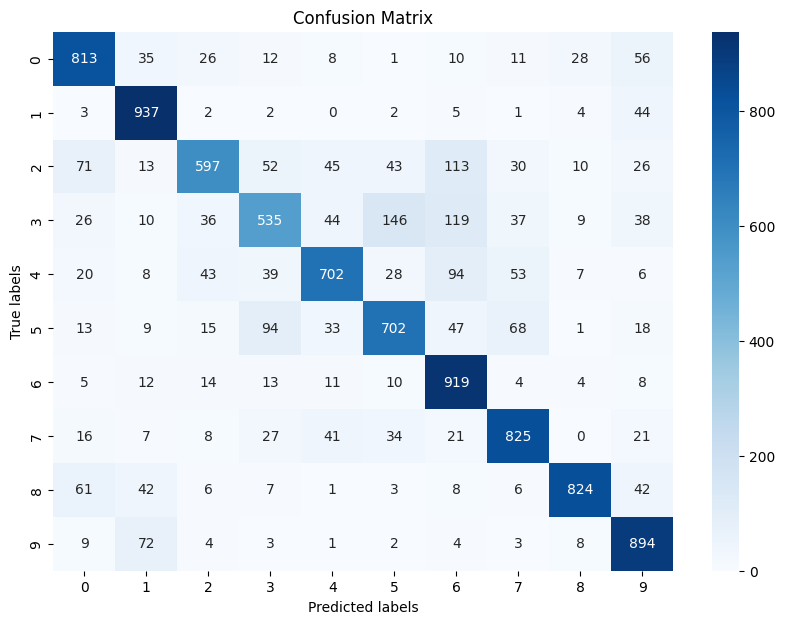

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to generate and display the confusion matrix as a table
def display_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_df = pd.DataFrame(cm, index=range(10), columns=range(10))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Display confusion matrix for the test set
display_confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_test)
